In [253]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from setuptools.command.rotate import rotate
from streamlit import plotly_chart

df = pd.read_excel("Docs/4 остатки склада wb.XLSX", header=1)

In [255]:
df.head(5)
new_columns_names = ['brand', 'item_type', 'season', 'collection', 'name', 'saler_article', 'wp_article', 'barcode', 'size', 'contract', 'warehouse', 'ordered_qty', 'summ_without_wb_commission', 'bought_qty', 'payments', 'remain_qty']

len(new_columns_names), len(df.columns)
columns_dict = {}
for i, v in zip(df.columns, new_columns_names):
    columns_dict[v] = i
    print(f"{v} - {i}")


df.columns = new_columns_names
df.head(5)

brand - Бренд
item_type - Предмет
season - Сезон
collection - Коллекция
name - Наименование
saler_article - Артикул продавца
wp_article - Артикул WB
barcode - Баркод
size - Размер
contract - Контракт
warehouse - Склад
ordered_qty - шт.
summ_without_wb_commission - Сумма заказов минус комиссия WB, руб.
bought_qty - Выкупили, шт.
payments - К перечислению за товар, руб.
remain_qty - Текущий остаток, шт.


,brand,item_type,season,collection,name,saler_article,wp_article,barcode,size,contract,warehouse,ordered_qty,summ_without_wb_commission,bought_qty,payments,remain_qty
0,INSEENSE GOLD,Ватные палочки,NaN,NaN,Детские ватные палочки с ограничителями 50 шт.,Ins50pa,8348552,4650099650400,0,NaN,Белые Столбы,1,144.15,1,144.15,0
1,INSEENSE GOLD,Ватные палочки,NaN,NaN,Детские ватные палочки с ограничителями 50 шт.,Ins50pa,8348552,4650099650400,0,NaN,Электросталь,1,144.15,0,0.00,0
2,INSEENSE GOLD,Ватные палочки,NaN,NaN,Детские ватные палочки с ограничителями 50 шт.,Ins50pa,8348552,4650099650400,0,NaN,Новосибирск,1,162.75,1,162.75,0
3,INSEENSE GOLD,Ватные палочки,NaN,NaN,Детские ватные палочки с ограничителями 50 шт.,Ins50pa,8348552,4650099650400,0,NaN,Коледино,1,144.15,1,162.75,0
4,INSEENSE GOLD,Ватные палочки,NaN,NaN,Детские ватные палочки с ограничителями 50 шт.,Ins50pa,8348552,4650099650400,0,NaN,Казань,138,21369.07,139,21700.22,34


In [256]:
shape = df.shape
print(f"строк: {shape[0]}, столбцов: {shape[1]}")
df.isnull().sum()


строк: 658, столбцов: 16


brand                           0
item_type                       0
season                        657
collection                    658
name                            0
saler_article                   0
wp_article                      0
barcode                         0
size                            0
contract                      647
warehouse                       0
ordered_qty                     0
summ_without_wb_commission      0
bought_qty                      0
payments                        0
remain_qty                      0
dtype: int64

In [257]:
df = df.drop(columns=['collection', 'season', 'contract'])

In [264]:
# df.dtypes()
df.item_type.unique()

array(['Ватные палочки', 'Клеенки детские', 'Прокладки для груди',
       'Пеленки', 'Пеленки для животных', 'Подгузники детские',
       'Влажные салфетки', 'Косметические наборы для ухода',
       'Бумажные салфетки', 'Ватные диски', 'Кремы', 'Присыпки',
       'Кондиционеры для белья', 'Гели для стирки', 'Соль для ванн',
       'Трусы одноразовые', 'Гели', 'Прокладки гигиенические',
       'Подгузники для взрослых', 'Таблетки для посудомоечных машин',
       'Средства для стирки', 'Салфетки медицинские',
       'Сиденья для унитаза', 'Шампуни', 'Экстракты для купания',
       'Салфетки косметические', 'Клеенки медицинские', 'Масла', 'Пенки'],
      dtype=object)

In [323]:
df1 = df[['item_type','ordered_qty', 'bought_qty' ]].groupby('item_type').sum()

df1['bought_qty'] = df1.apply(lambda row: min(row['bought_qty'], row['ordered_qty']), axis=1)
# df1 = df1.groupby('item_type').sum().query('ordered_qty > 0')
df1['conversion'] = (df1['bought_qty'] / df1['ordered_qty'] * 100).round(2)
df1


,ordered_qty,bought_qty,conversion
item_type,,,
Бумажные салфетки,123,105,85.37
Ватные диски,282,272,96.45
Ватные палочки,591,477,80.71
Влажные салфетки,1154,1003,86.92
Гели,28,28,100.00
Гели для стирки,9,6,66.67
Клеенки детские,740,610,82.43
Клеенки медицинские,4,3,75.00
Кондиционеры для белья,1,1,100.00


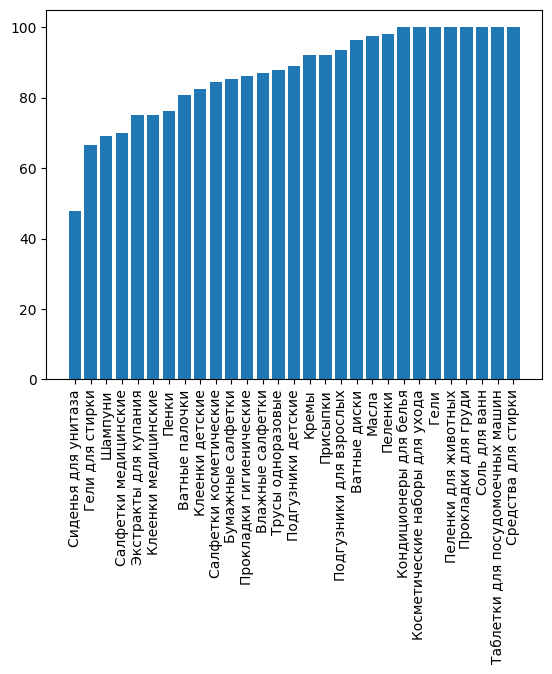

In [324]:
df1.sort_values(by='conversion', ascending=True, inplace=True)

plt.bar(df1.index, height=df1['conversion'])
plt.xticks(rotation = 90)

plt.show()

In [325]:
df.item_type.unique()
df1  = df.groupby('item_type')[['ordered_qty', 'bought_qty']].sum().reset_index()
# df1.loc[:, df['ordered_qty']]
max_order_group = df1.loc[df1['ordered_qty'].idxmax(), 'item_type']

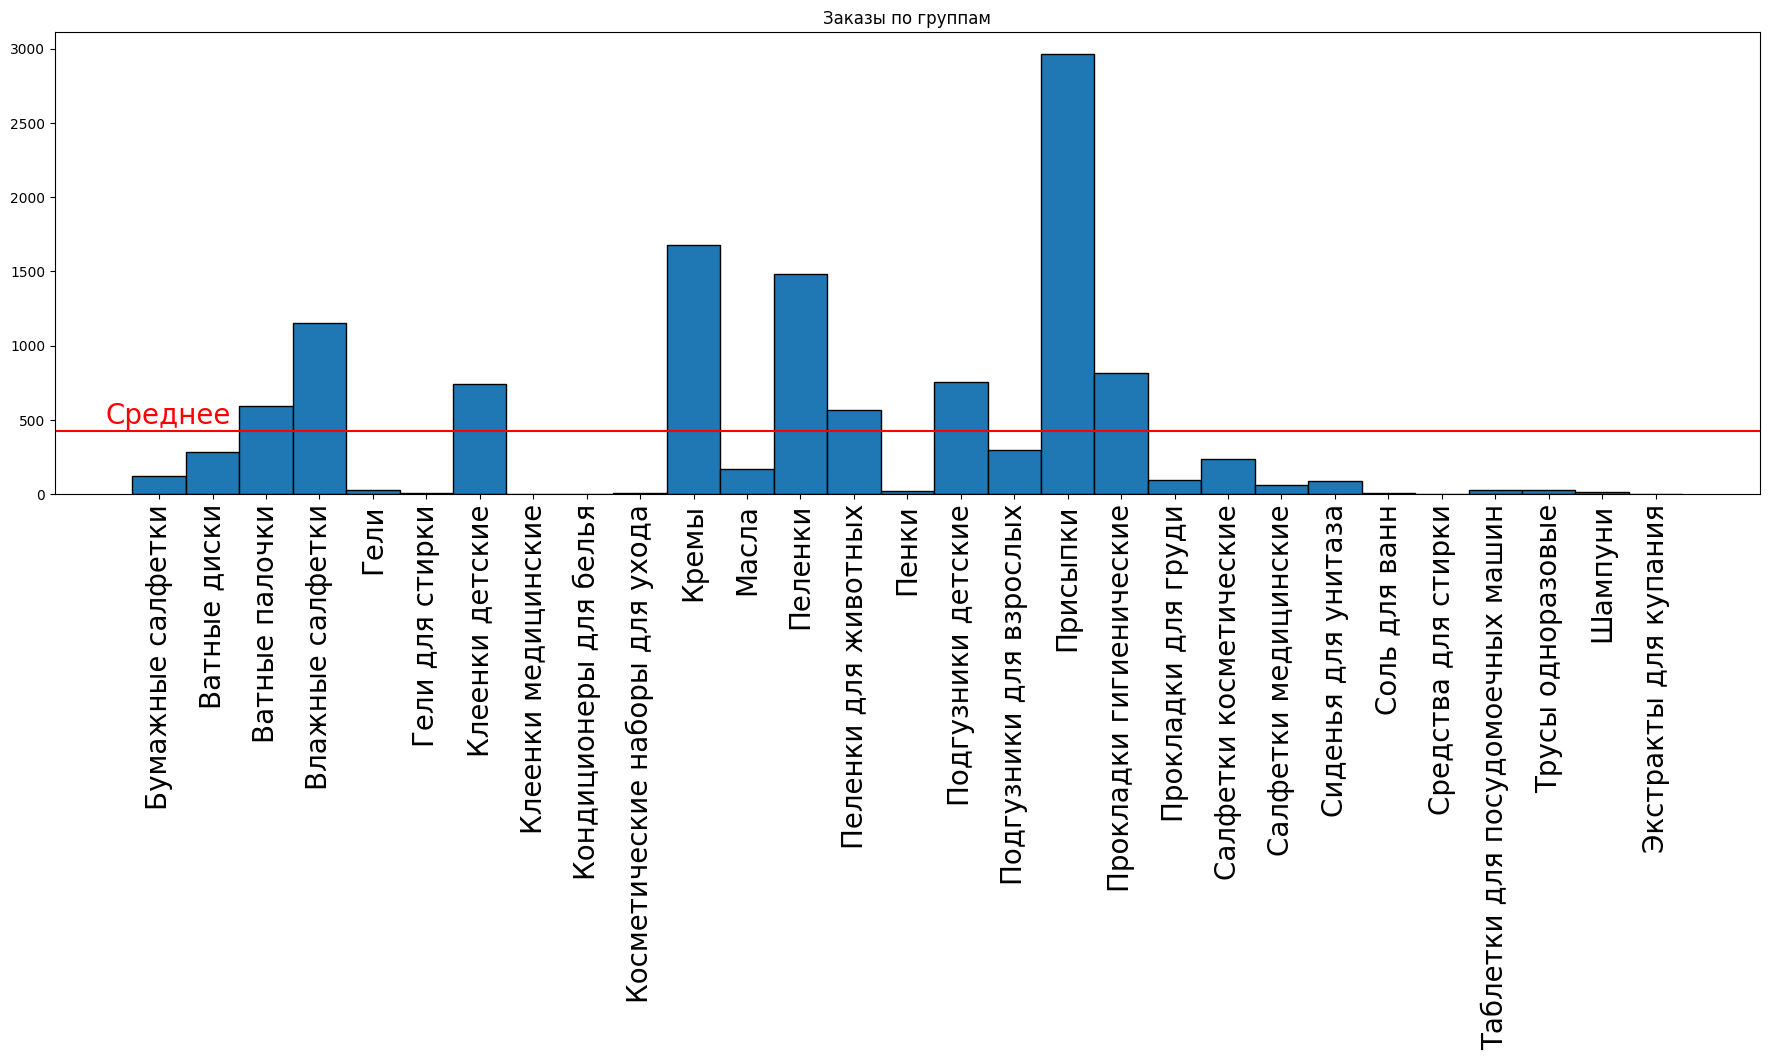

In [330]:
plt.figure(figsize=(22,6))
plt.title('Заказы по группам')
plt.bar(df1['item_type'],  height=df1['ordered_qty'], width=1,  edgecolor='black')
plt.xticks(rotation=90, fontsize=20)
plt.axhline(df1['ordered_qty'].mean(), color='red')
plt.text(x = -1, y = df1['ordered_qty'].mean() + 50, s="Среднее", color='red', fontsize=20)

plt.show()


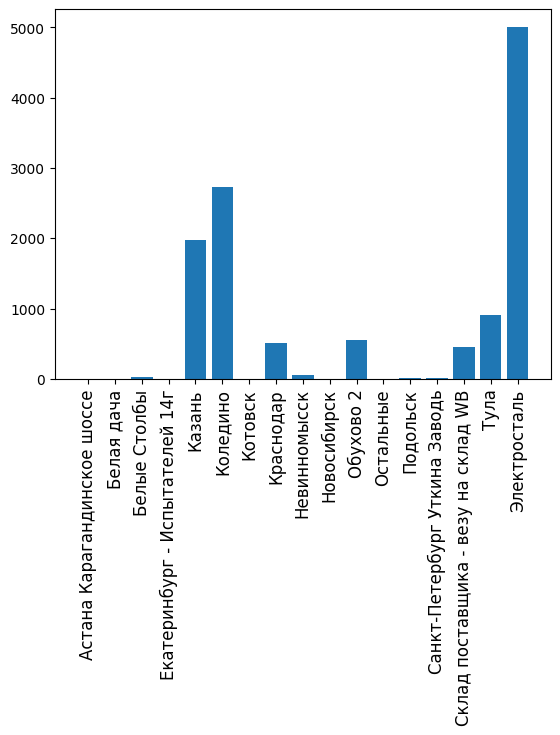

In [200]:
# df[['item_type', 'warehouse', 'ordered_qty', 'bought_qty']].groupby(['warehouse', 'item_type'])['ordered_qty'].sum()
df1 = df.groupby('warehouse')['ordered_qty'].sum().reset_index()
plt.bar(x=df1.warehouse, height=df1['ordered_qty'])
plt.xticks(rotation=90, fontsize=12)
plt.show()


In [201]:
df.warehouse.unique()

array(['Белые Столбы', 'Электросталь', 'Новосибирск', 'Коледино',
       'Казань', 'Тула', 'Котовск', 'Склад поставщика - везу на склад WB',
       'Екатеринбург - Испытателей 14г', 'Невинномысск',
       'Астана Карагандинское шоссе', 'Краснодар',
       'Санкт-Петербург Уткина Заводь', 'Подольск', 'Обухово 2',
       'Остальные', 'Белая дача'], dtype=object)

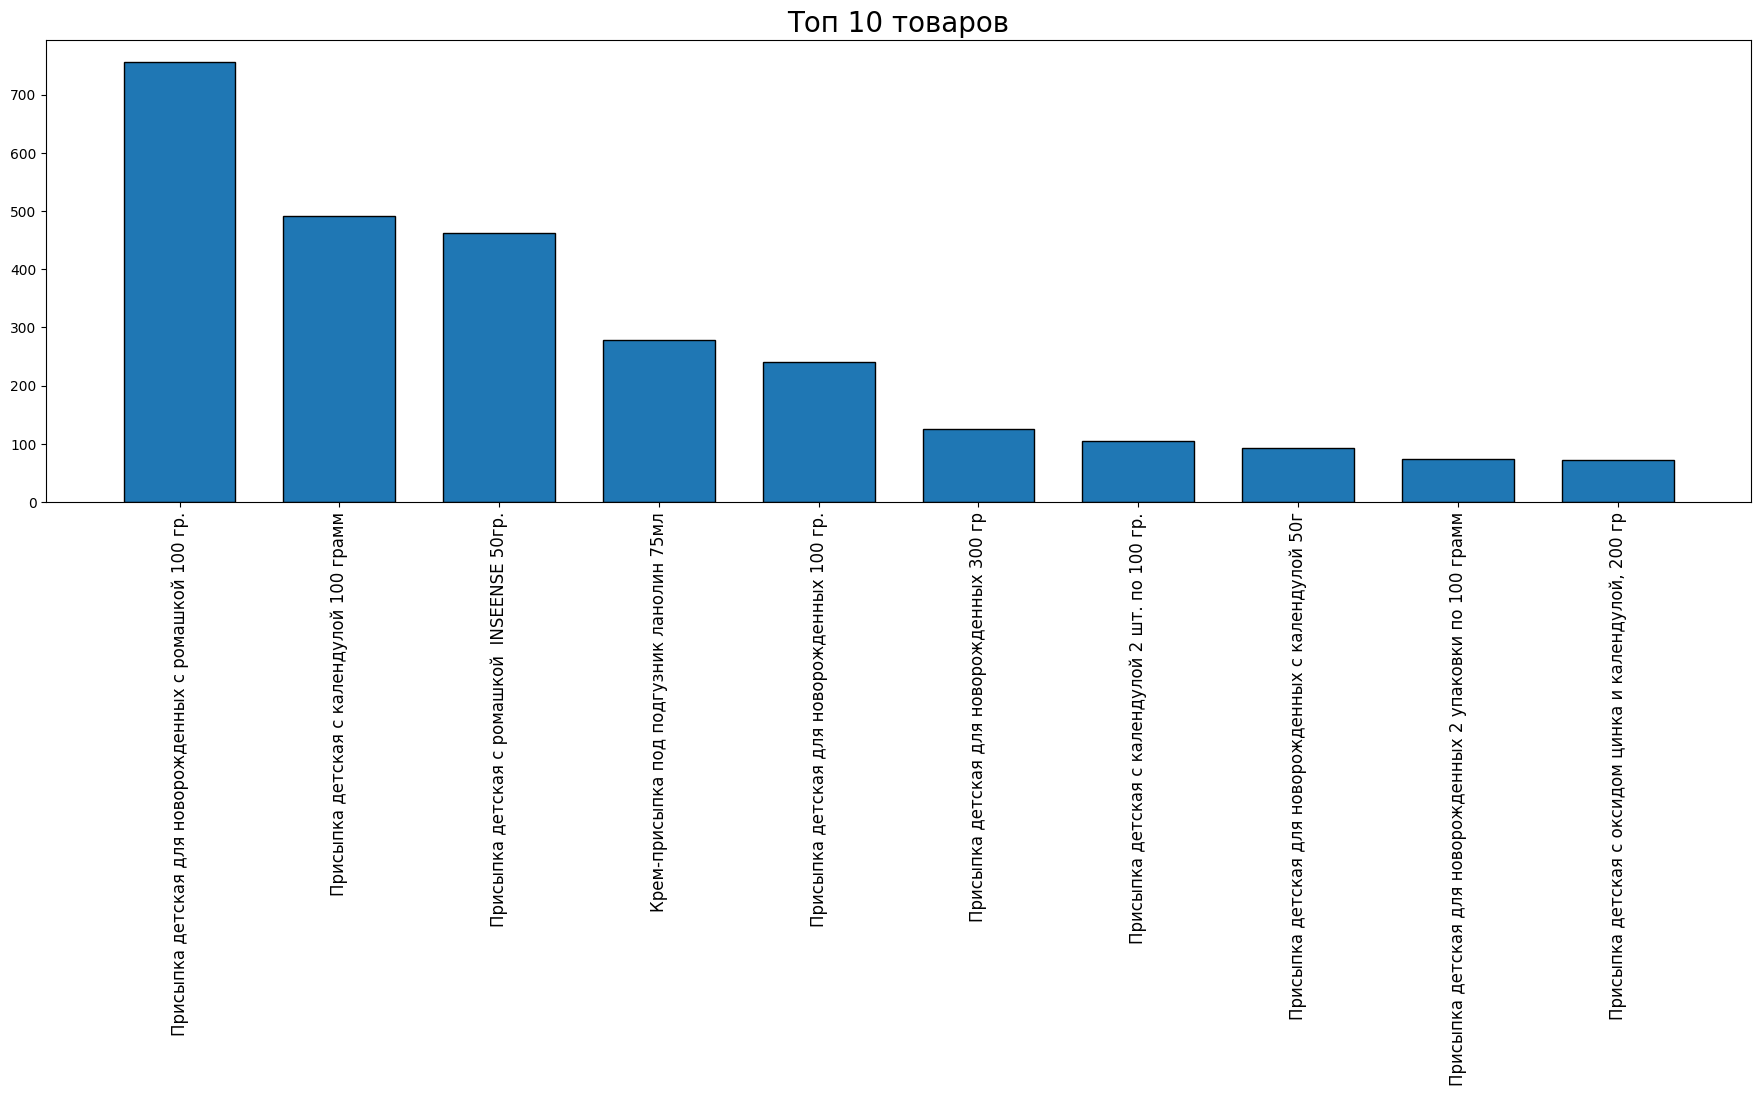

,name,barcode,saled
0,Присыпка детская для новорожденных с ромашкой ...,4650099657409,756
1,Присыпка детская с календулой 100 грамм,4650099656273,492
2,Присыпка детская с ромашкой INSEENSE 50гр.,4650099653869,462
3,Крем-присыпка под подгузник ланолин 75мл,4650099655733,279
4,Присыпка детская для новорожденных 100 гр.,4650099655146,241
5,Присыпка детская для новорожденных 300 гр,4650099655368,126
6,Присыпка детская с календулой 2 шт. по 100 гр.,4650099656525,104
7,Присыпка детская для новорожденных с календуло...,4650099656266,93
8,Присыпка детская для новорожденных 2 упаковки ...,4650099655320,74
9,"Присыпка детская с оксидом цинка и календулой,...",4650099657362,73


In [351]:

df1 = df.loc[df['item_type'] == max_order_group].groupby(['name', 'barcode']).agg(saled = ('ordered_qty', 'sum')).sort_values(by='saled', ascending=False).reset_index().head(10)

plt.figure(figsize=(22,6))
plt.title('Топ 10 товаров', fontsize=20)
plt.bar(df1['name'],  height=df1['saled'], width=0.7,  edgecolor='black')
plt.xticks(rotation=90, fontsize=12)

plt.show()
df1